# 9.6.7 bootstrapping with uniform distributions

* `X1,...,Xn ~ Unif(0, theta)`
* `theta_hat = mle = X_max = max(X_1,...,X_n)`
* Comparing the true distribution of `theta_hat` with the bootstrap estimated distributions, using both non-parametric and parametric strategies for doing the bootstrap

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(0)

## distribution of theta_hat

```
Pr(theta_hat < 0) = 0
Pr(theta_hat > theta) = 0

For 0<x<theta:
Pr(theta_hat < x) = Pr(max(X_1,...,X_n) < x) = Pr(X_i < x for all i) = (x/theta)^n
Hence, cdf of theta_hat is (x/theta)^n
Hence, pdf of theta_hat is n * x^n-1 / theta^n
```

In [3]:
def plot_true_distribution(n, theta, ax):
    """
    plots the true probability density function of
    theta_hat = max(X_1,...,X_n), where X_i ~ Unif(0, theta)

    inputs:
        n - size of sample
        theta - upper limit of uniform distribution

    outputs:
        plot of pdf of theta_hat
    """
    x_values = np.linspace(0, 1, 10 * n)
    pdf_values = n * np.power(x_values, n - 1) / np.power(theta, n)

    ax.plot(x_values, pdf_values, label="true_distribution")

    return ax

## estimated distribution of theta_hat from bootstraps

In [4]:
def create_sample_uniform(n, theta):
    """
    create n samples from Unif(0, theta)

    inputs:
        n - size of sample
        theta - upper limit of uniform distribution

    outputs:
        numpy array - sample of size n from distribution
    """
    return np.random.random(size=n) * theta

In [5]:
def create_bootstrap_sample(sample, strategy="nonparametric"):
    """
    create a bootstrap sample from a sample from a uniform distribution

    inputs:
        sample - numpy array of a sample of data
        strategy - either 'nonparametric' or 'parametric'

    outputs:
        bootstrap_samply - numpy array of a bootstrap sample
    """
    n = sample.shape[0]
    theta_hat = max(sample)

    if strategy == "nonparametric":
        # approximate true distribution using empirical distribution fn
        # sampling from this approximation is equivalent to picking
        # from the sample n times with replacement
        return np.random.choice(sample, n)

    elif strategy == "parametric":
        # approximate true distribution using Unif(0, theta_hat)
        # where theta_hat is max(sample)
        return create_sample_uniform(n, theta_hat)

In [6]:
def create_bootstrap_distribution(sample, K, strategy="nonparametric"):
    """
    given a sample from Unif(0,theta), create K bootstrap estimates
    of theta_hat

    inputs:
        sample - numpy array of a sample of data
        K - number of bootstrap estimates to create
        strategy - either 'nonparametric' or 'parametric'

    outputs:
        theta_hat_stars - numpy of array of length K
          of bootstrap estimates of theta_hat
    """
    theta_hat_stars = np.empty(shape=(K,))

    for i in range(K):
        theta_hat_stars[i] = max(create_bootstrap_sample(sample, strategy=strategy))

    return theta_hat_stars

In [7]:
n = 50
theta = 1
sample = create_sample_uniform(n, theta)
theta_hat = max(sample)
print(theta_hat)

0.978618342232764


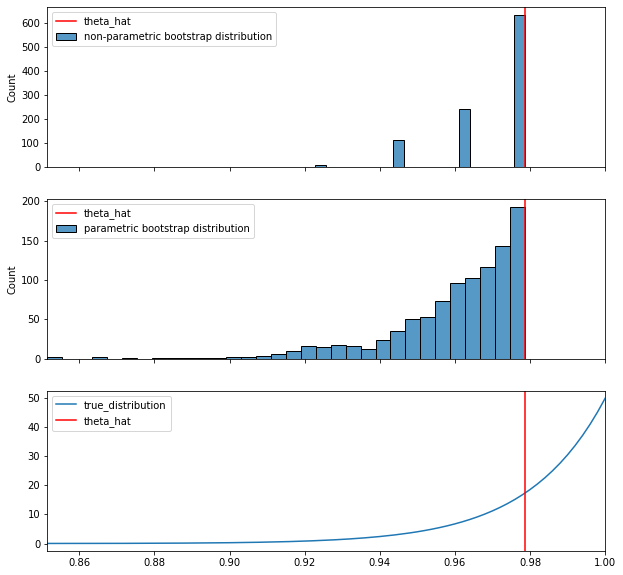

In [8]:
theta_hat_stars_nonp = create_bootstrap_distribution(
    sample, K=1000, strategy="nonparametric"
)
theta_hat_stars_p = create_bootstrap_distribution(sample, K=1000, strategy="parametric")

xmin = min(min(theta_hat_stars_nonp), min(theta_hat_stars_p))

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=True)
axs[0].set_xlim(left=xmin, right=1)

sns.histplot(
    theta_hat_stars_nonp, label="non-parametric bootstrap distribution", ax=axs[0]
)
axs[0].axvline(x=theta_hat, color="red", label="theta_hat")
axs[0].legend()

sns.histplot(theta_hat_stars_p, label="parametric bootstrap distribution", ax=axs[1])
axs[1].axvline(x=theta_hat, color="red", label="theta_hat")
axs[1].legend()

axs[2] = plot_true_distribution(n, theta, axs[2])
axs[2].axvline(x=theta_hat, color="red", label="theta_hat")
axs[2].legend()

## calculate probability of p_hat^star = p_hat

### parametric
In parametric case, `p_hat^star` has a continuous distribution, so probability of it equalling any value is 0, so in particular,  `Pr(p_hat^star = p_hat) = 0`

### non-parametric
`Pr(p_hat^star = p_hat)` is the probability that at least one of the elements of a single bootstrap sample is equal to `p_hat`.  The negation of this is odds of all elements not being equal to `p_hat`, which equals `(1-1/n)^n` which tends to `exp(-1)` as `n` tends to infinity.

Hence, `Pr(p_hat^star = p_hat) = 1 - (1-1/n)^n \approx 1 - exp(-1) \approx 0.632`, as required